In [226]:
#import required modules in one place

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [227]:
pd.set_option('display.max_rows', 500) 

In [228]:
#load the dataset
df = pd.read_csv('train.csv')

# Data Cleaning

In [229]:
df.shape

(1460, 81)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [231]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [232]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**finding missing value columns**

In [233]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageCond       0.06
GarageYrBlt      0.06
GarageFinish     0.06
GarageQual       0.06
BsmtFinType1     0.03
BsmtExposure     0.03
BsmtCond         0.03
BsmtQual         0.03
BsmtFinType2     0.03
MasVnrArea       0.01
MasVnrType       0.01
Exterior2nd      0.00
Exterior1st      0.00
OverallCond      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
SalePrice        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
MSSubClass       0.00
BsmtFinSF1       0.00
HeatingQC 

In [234]:
#dropping columns with missing vallue above 10%
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values > 0.10]


LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [235]:
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis='columns')

In [236]:
#removing column 'Id' as it is of no significance to the model
df.drop(['Id'],axis=1, inplace=True)

In [237]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
#df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [238]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [239]:
# Removing columns where all values are same or unique value is one.
uniques = df.apply(lambda x:x.nunique())
df_loan = df.drop(uniques[uniques < 2].index, axis = 1)
print(df.shape)
#print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1460, 74)


In [240]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0
...,...,...,...
1455,1999,2000,1999.0
1456,1978,1988,1978.0
1457,1941,2006,1941.0
1458,1950,1996,1950.0


**converting year columns to days/years from today for better analysis**

In [241]:
#Creating derived features for years
df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']
df['DiffYrSold'] = pd.datetime.now().year - df['YrSold']
df[['DiffYearBuilt', 'DiffYearRemodAdd','DiffGarageYrBlt', 'DiffYrSold']].sample(10)

,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt,DiffYrSold
1426,27,27,27.0,13
1171,63,63,63.0,13
368,67,67,67.0,11
463,87,26,82.0,13
226,26,26,26.0,14
142,69,69,21.0,11
1377,80,61,44.0,12
963,14,14,14.0,12
892,58,18,58.0,15
850,18,18,18.0,14


**Dropping the old columns**

In [242]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt', 'YrSold' ], axis='columns')

# Data Analysis 

In [243]:
#Separating out categorical columns for data analysis
categoricalCols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']

for column in categoricalCols:
    print(column , ':' , df[column].unique())

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
RoofStyle : ['Gable' 'Hip'

**Box plots to analyze categorical columns**

In [244]:
def categorical_col_analysis(i, col_i, col_o):
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

In [245]:
#setting up target column
out_col = 'SalePrice'

<Figure size 432x288 with 0 Axes>

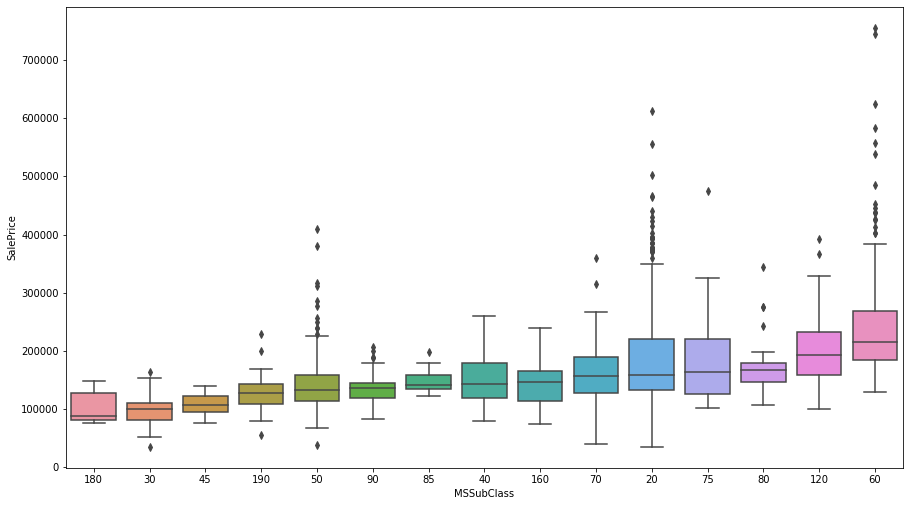

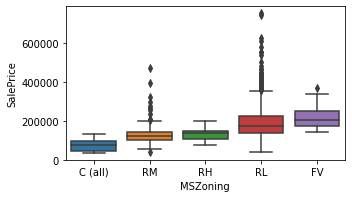

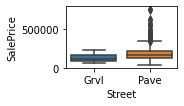

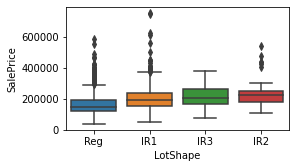

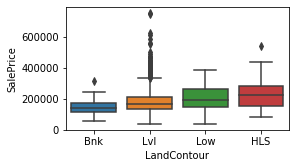

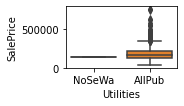

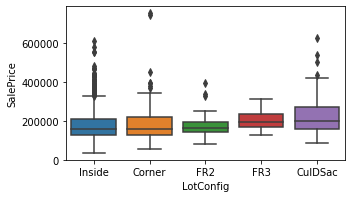

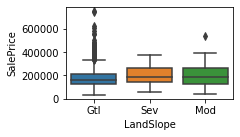

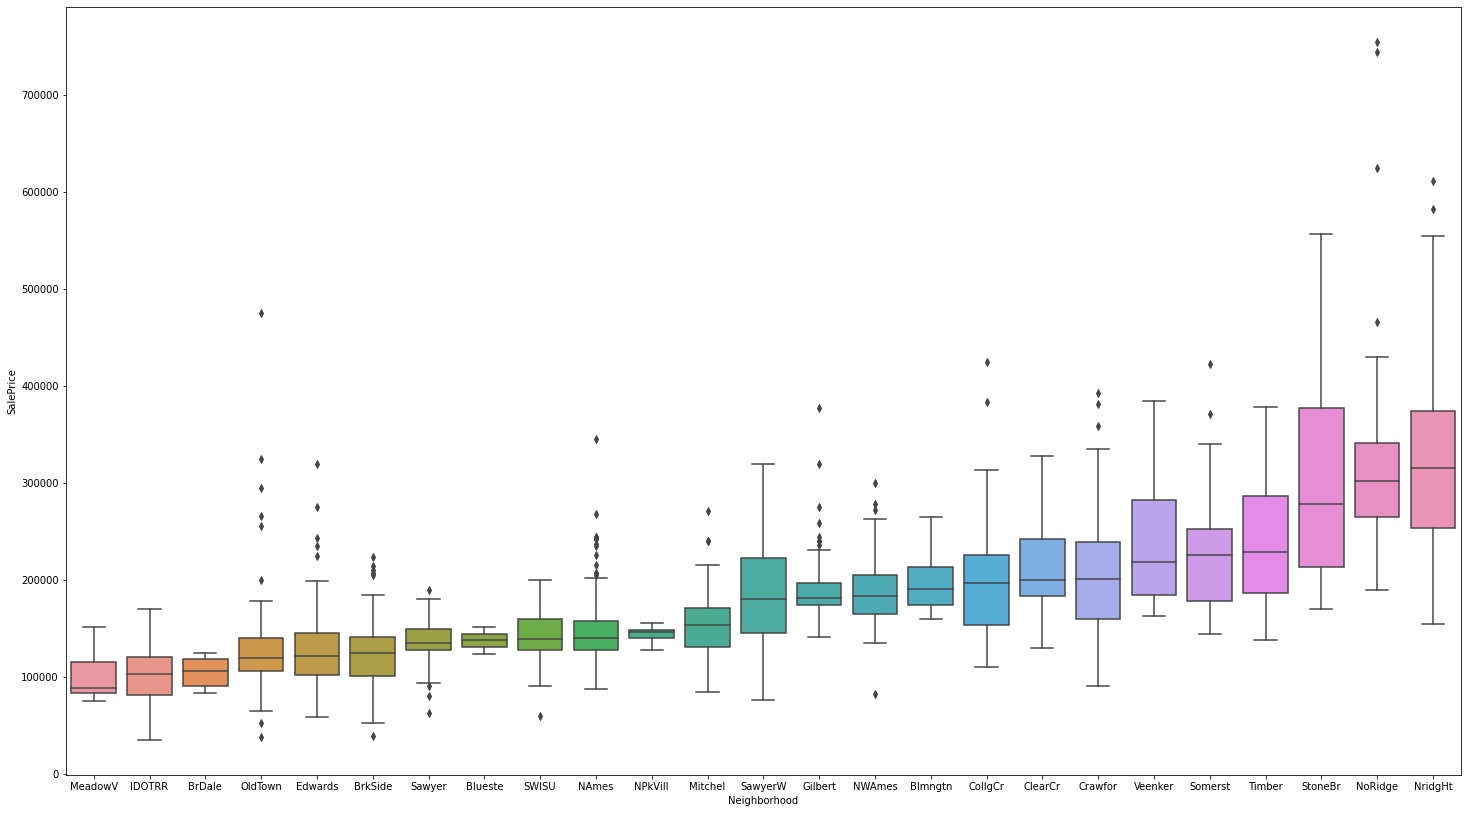

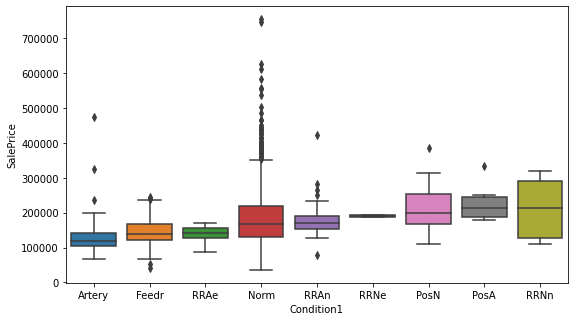

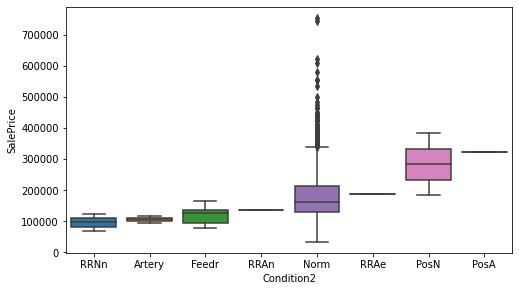

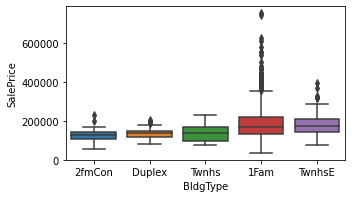

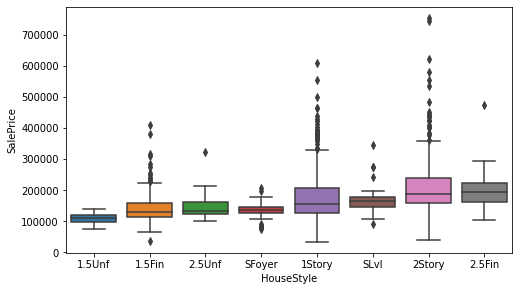

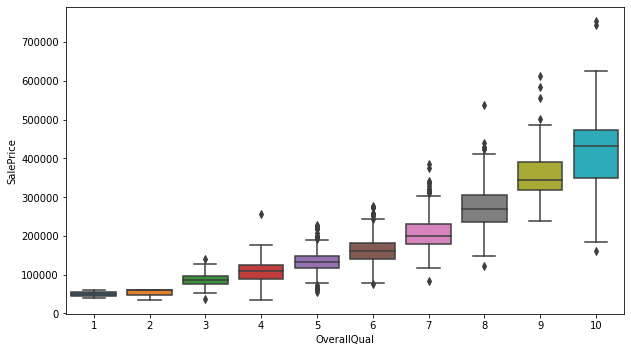

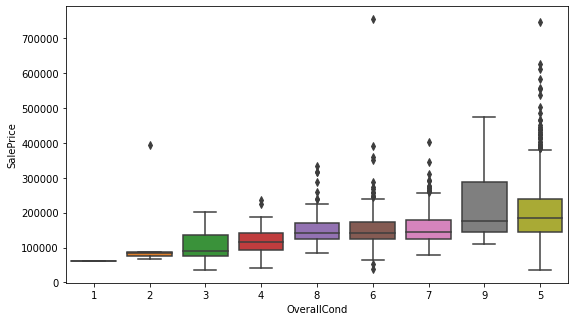

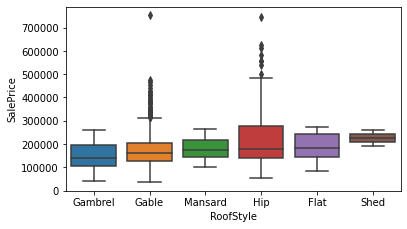

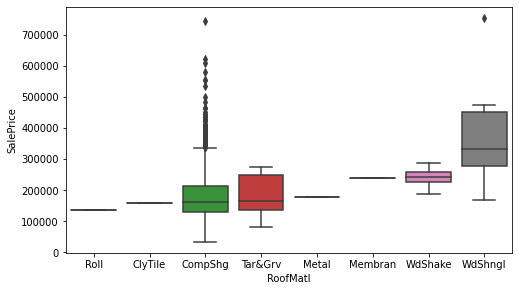

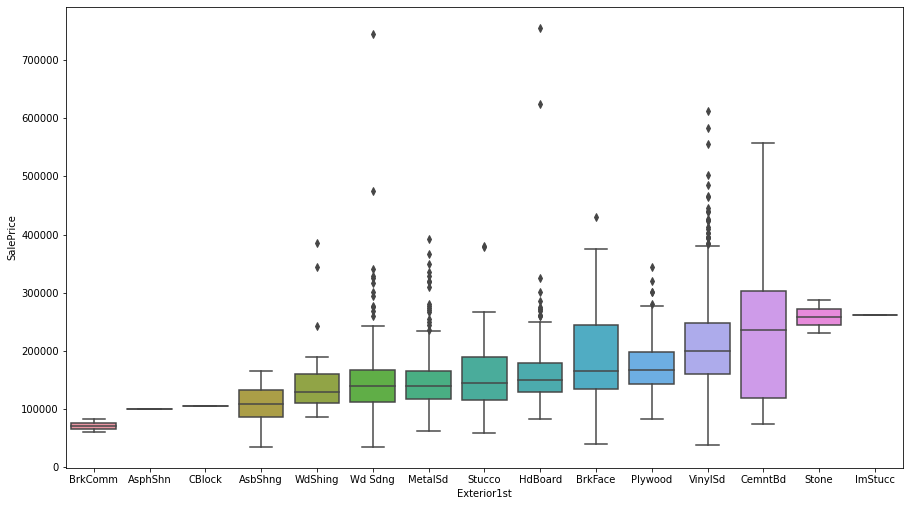

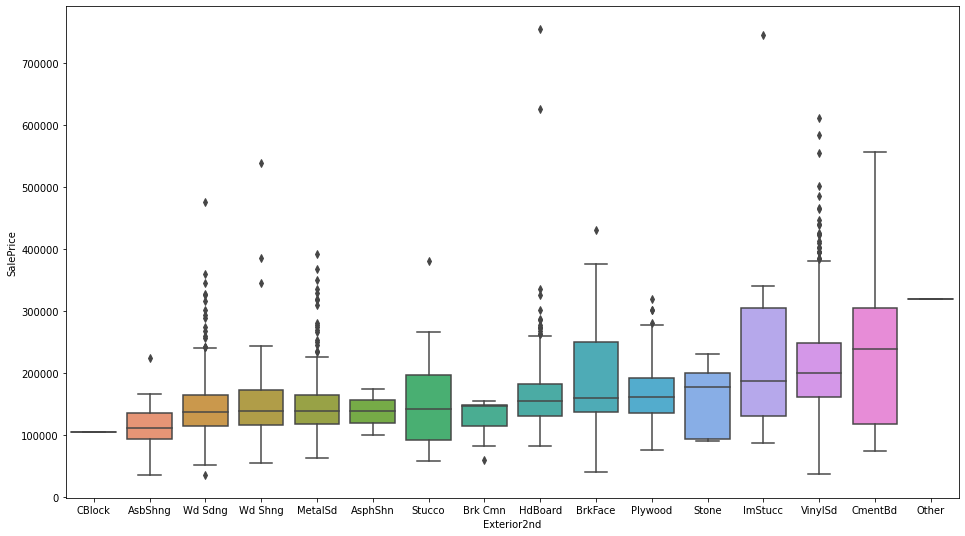

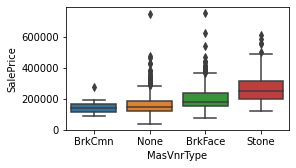

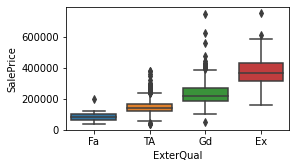

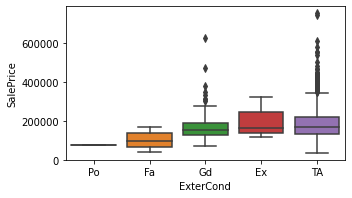

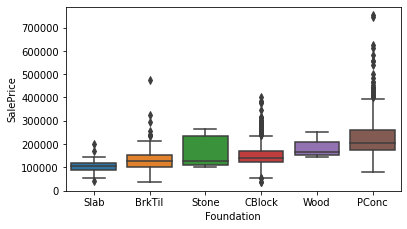

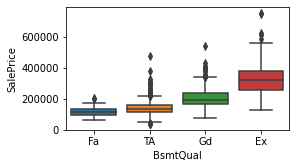

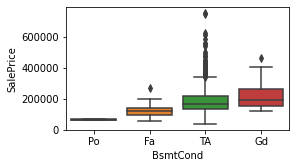

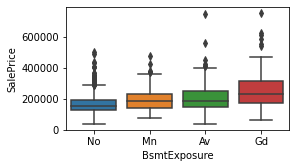

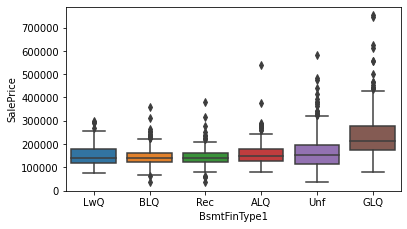

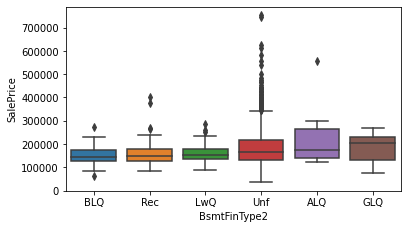

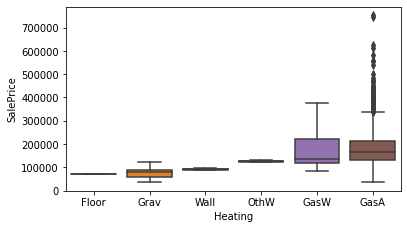

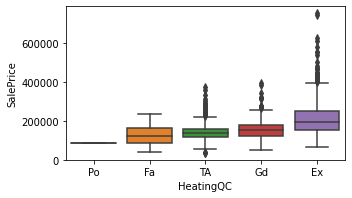

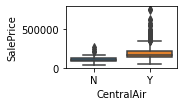

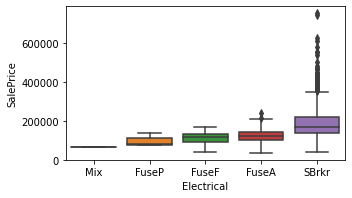

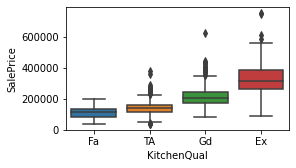

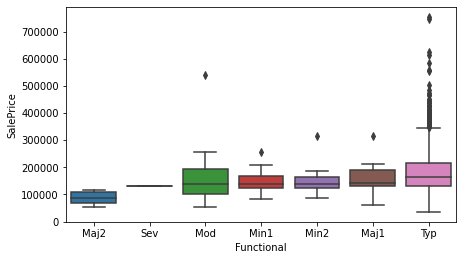

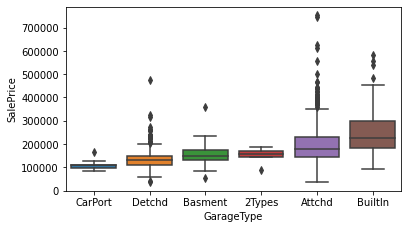

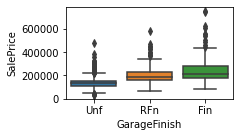

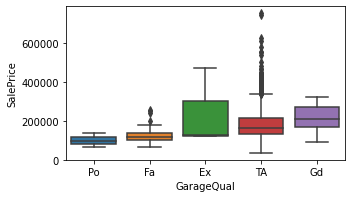

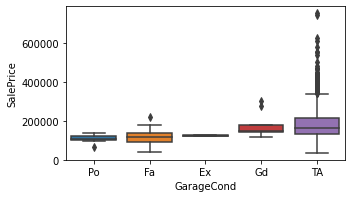

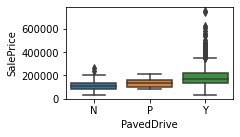

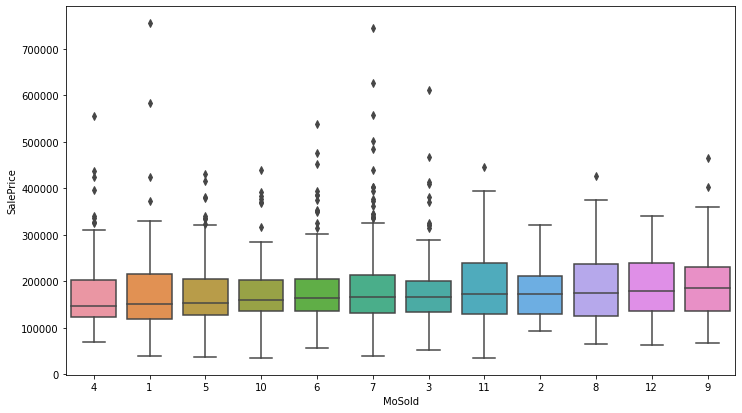

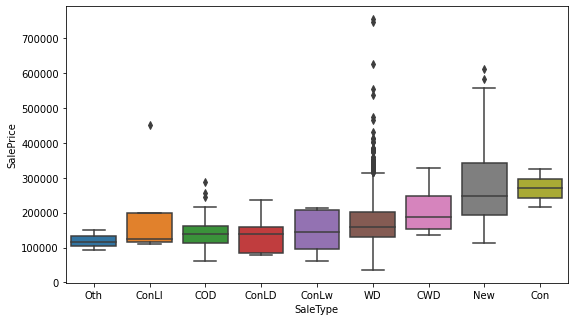

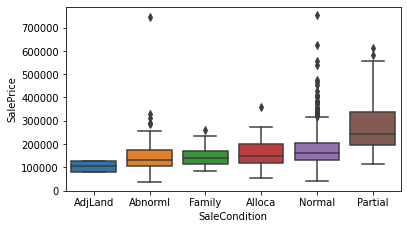

In [246]:
for i, column in enumerate(categoricalCols):
    categorical_col_analysis(i, column, out_col)

**Joint plot to analyse the relationship of numerical columns with target value**

In [247]:
def numerical_col_analysis(i, col_i, col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

In [248]:
numericalCols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']

<Figure size 432x288 with 0 Axes>

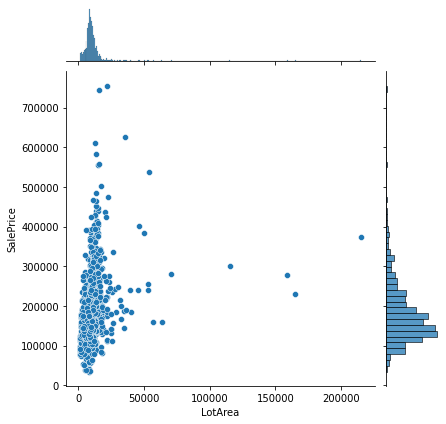

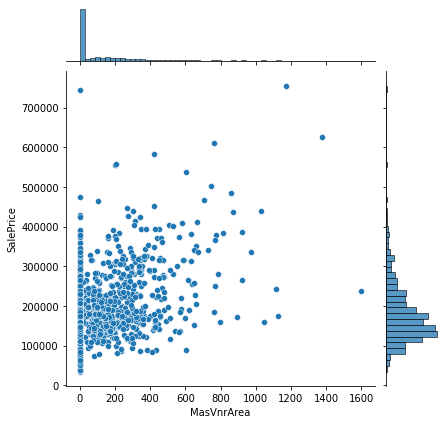

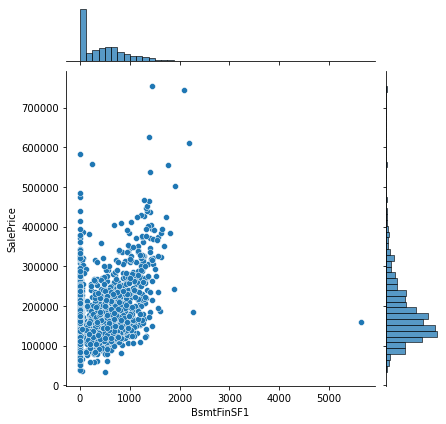

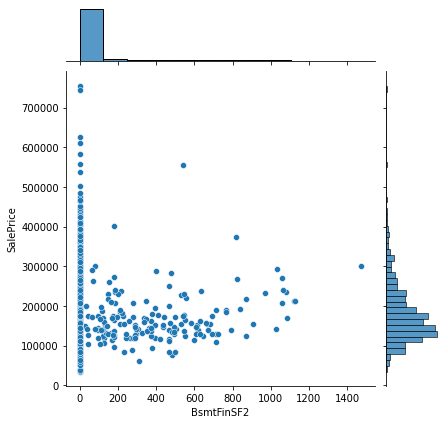

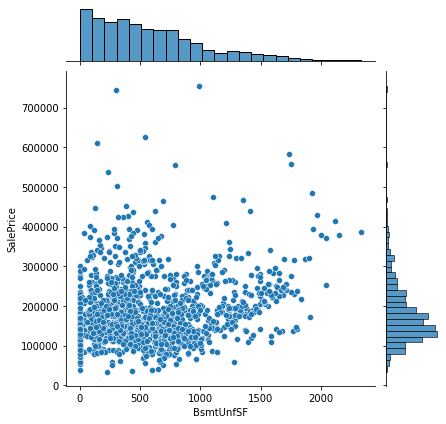

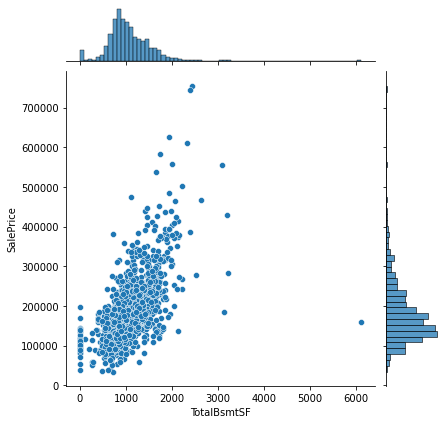

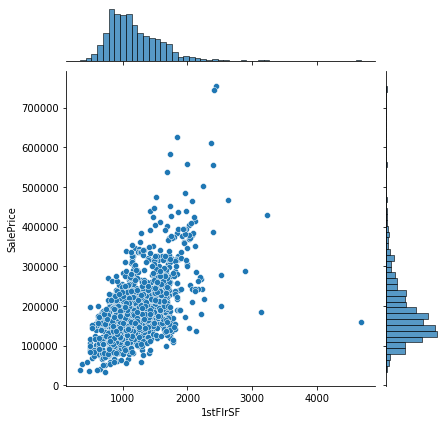

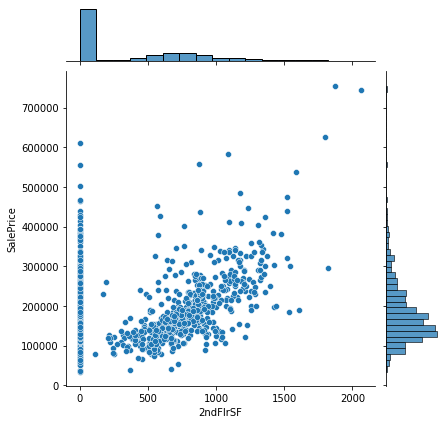

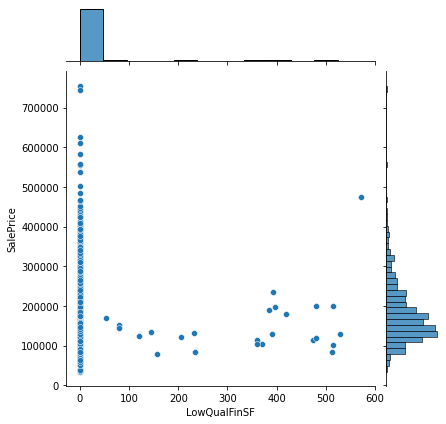

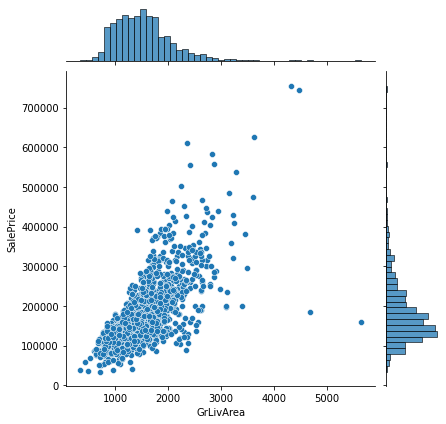

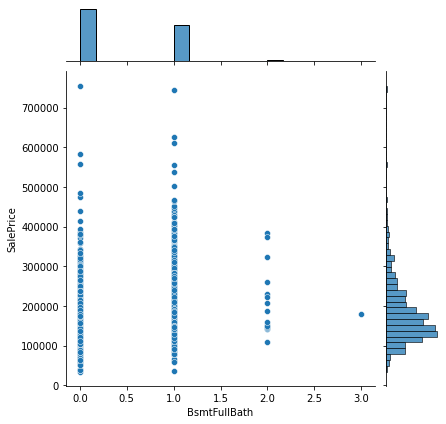

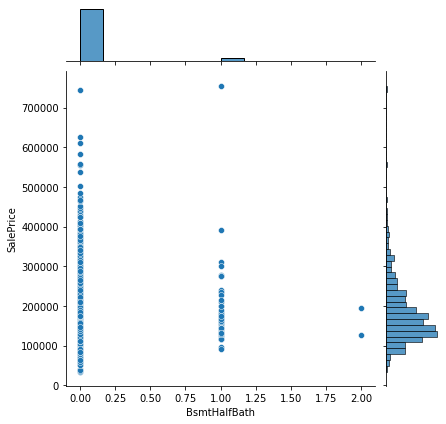

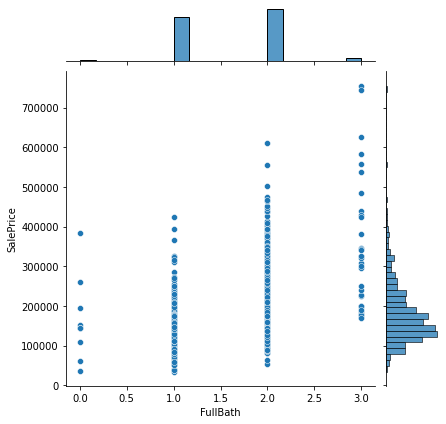

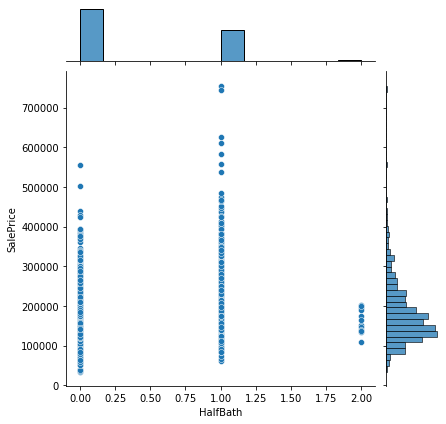

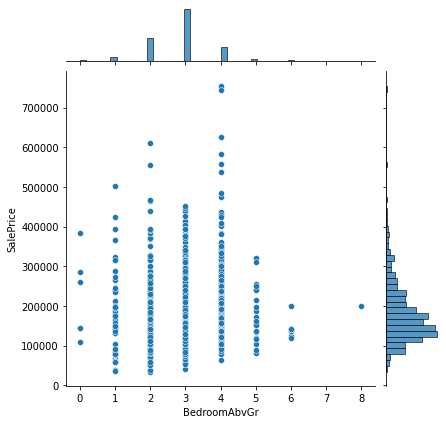

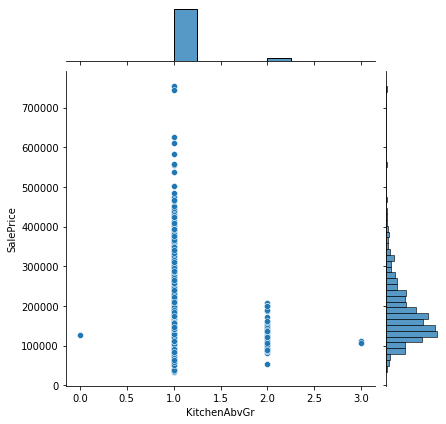

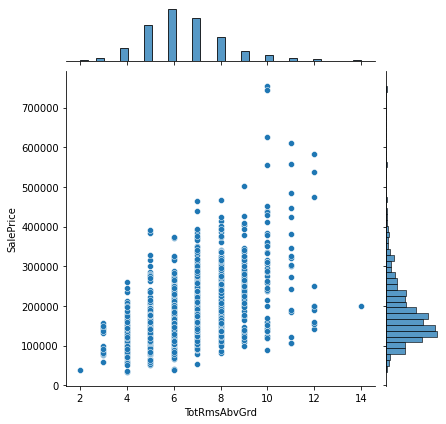

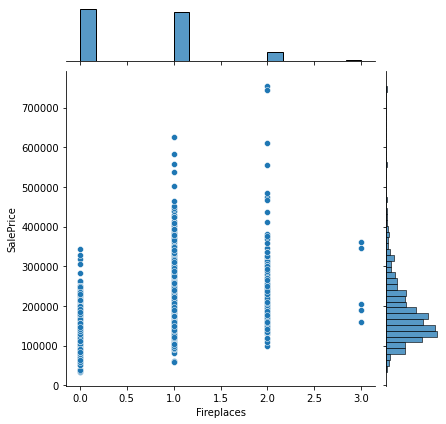

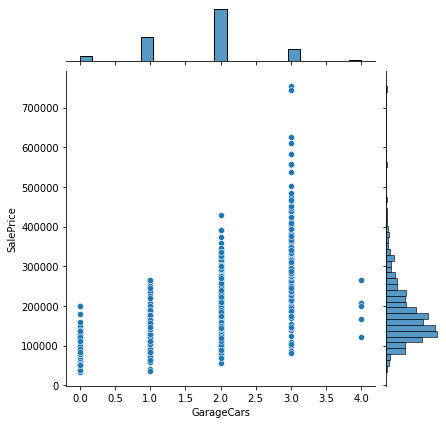

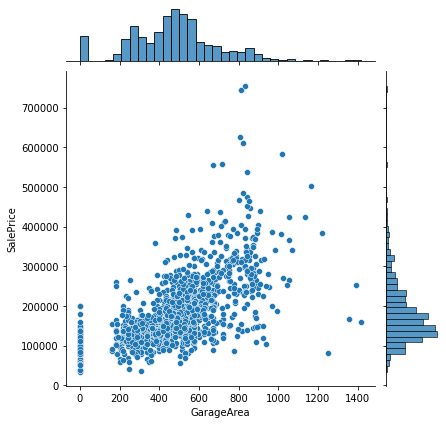

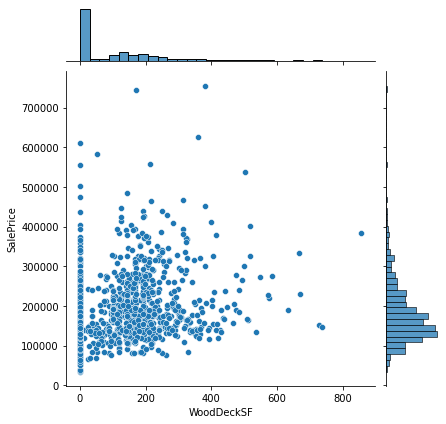

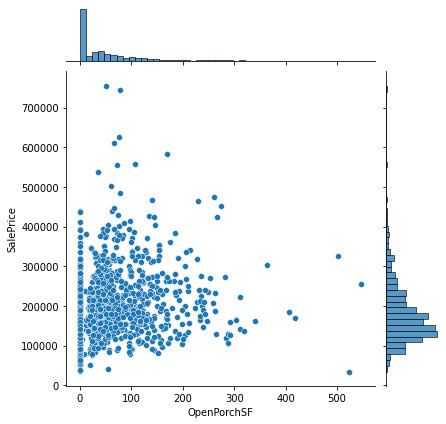

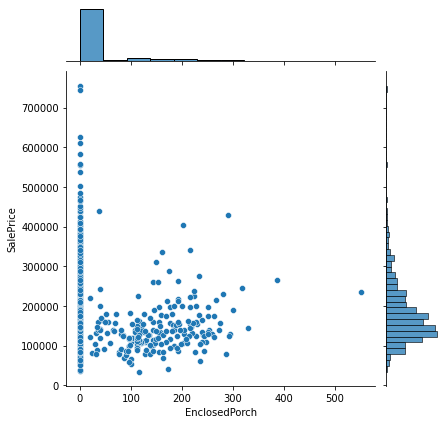

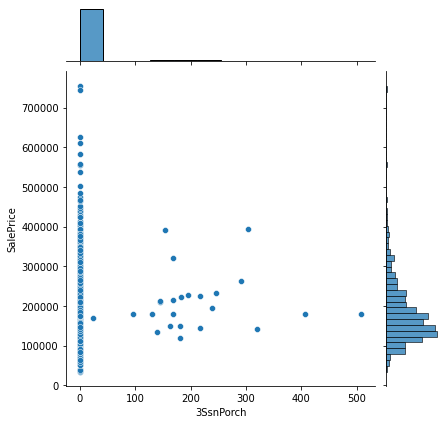

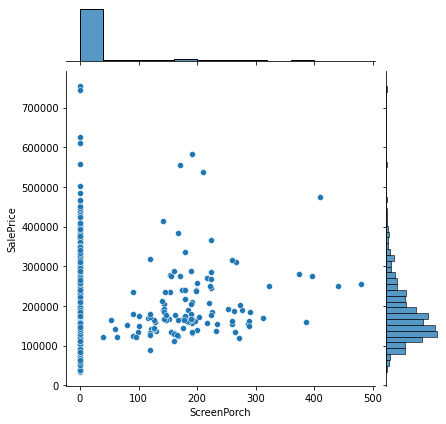

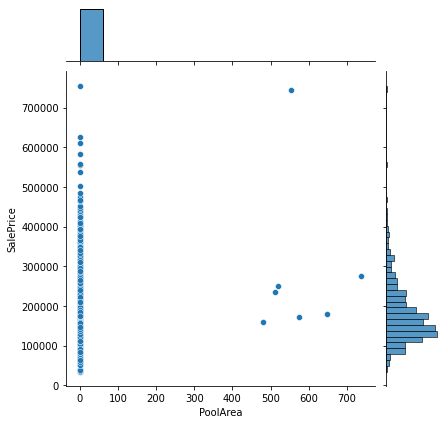

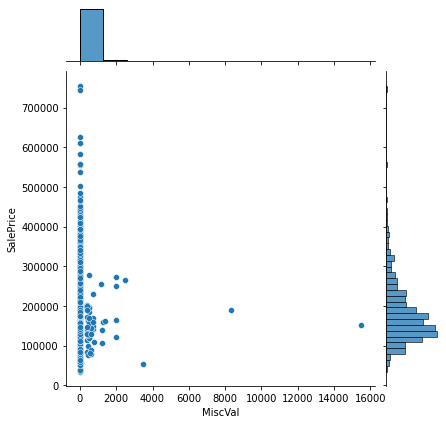

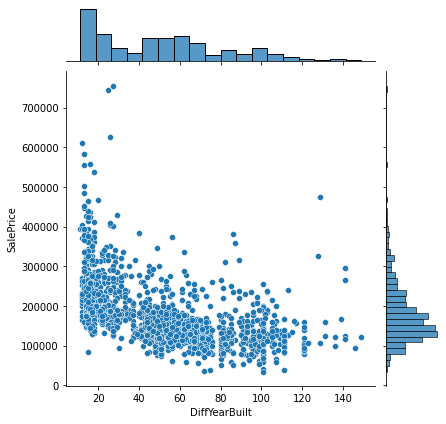

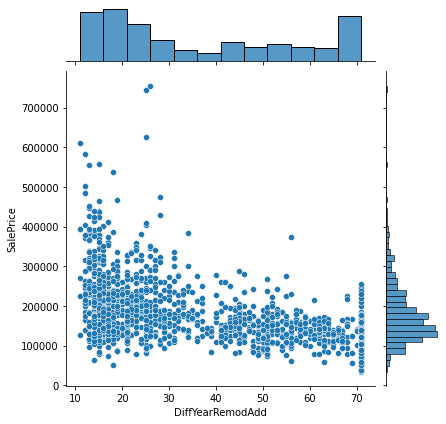

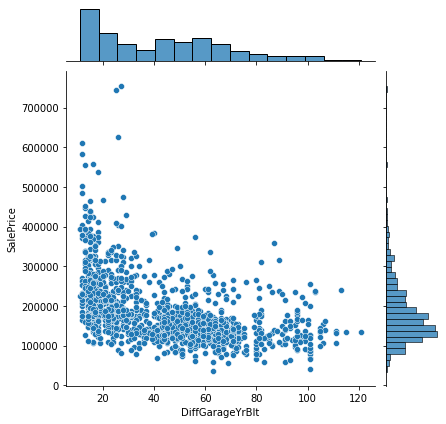

In [249]:
for i, column in enumerate(numericalCols):
    numerical_col_analysis(i, column, out_col)

**Heat map**

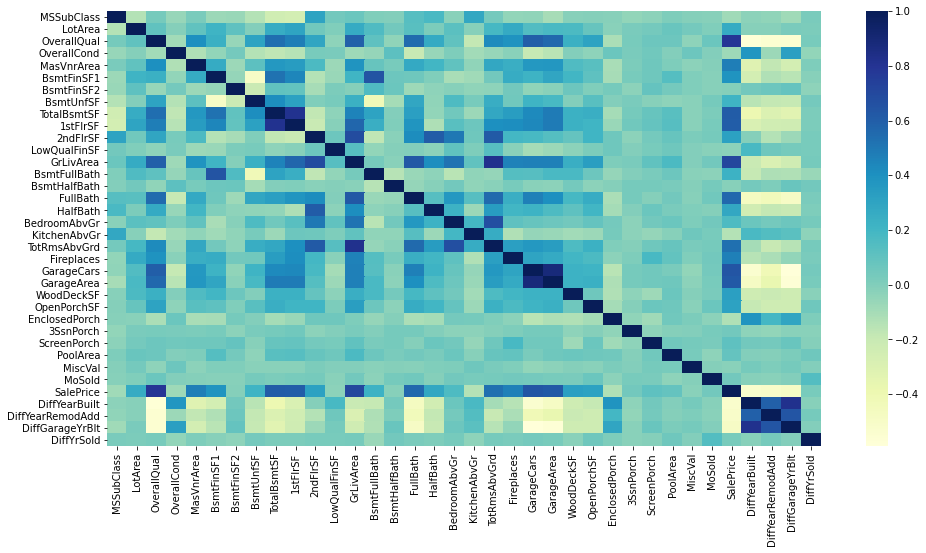

In [250]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

**Dropping Outlier Values**

In [251]:
def drop_outliers(x):
    list = []
    for col in numericalCols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [252]:
df.shape

(1361, 74)

**Creating Dummy Columns for categorical data**

In [253]:
for column in categoricalCols:
    dummies = pd.get_dummies(df[column], drop_first = True)
    dummies = dummies.add_prefix(f'{column}_')
    df = pd.concat([df, dummies], axis = 1)
    df.drop([column], axis = 1, inplace = True)

df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,150,856,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,162.0,486,0,434,920,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
3,9550,0.0,216,0,540,756,961,756,0,1717,...,0,0,0,0,1,0,0,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0


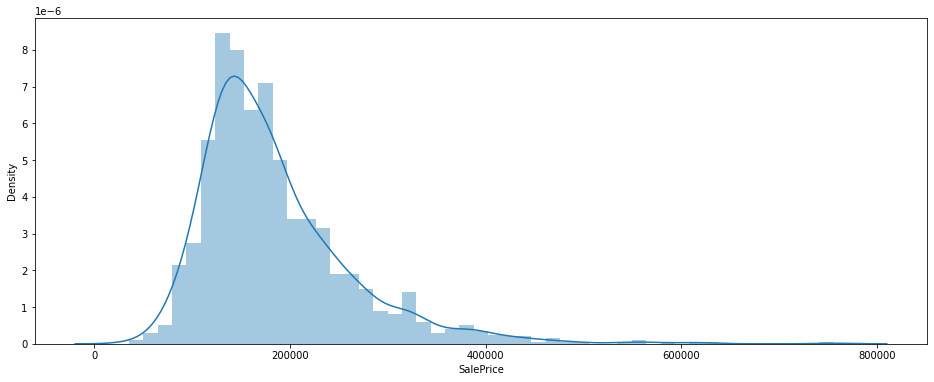

In [254]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

# Data Preparation

**Creating train and test dataset for validation purpose**

In [255]:
y = df.loc[:, out_col]
X = df.loc[:, df.columns != out_col]

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [256]:
# scale
scaler = StandardScaler()
X_train[numericalCols] = scaler.fit_transform(X_train[numericalCols])
X_test[numericalCols] = scaler.transform(X_test[numericalCols])

## Simple Linear Regression

In [257]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9517705383693652
-2.657149263452574e+16


In [258]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(5643160483507731.0, 'GrLivArea'),
 (-4855295117975606.0, '2ndFlrSF'),
 (-4179019588626160.5, '1stFlrSF'),
 (-2799900729568046.0, 'BsmtUnfSF'),
 (2733691522820820.5, 'PoolArea'),
 (-2691570289271621.0, 'BsmtFinSF1'),
 (2559396431972596.5, 'TotalBsmtSF'),
 (-1011637561581885.1, 'BsmtFinSF2'),
 (-570453751891807.4, 'MSSubClass_90'),
 (570453751879251.5, 'BldgType_Duplex'),
 (-462644604778745.75, 'LowQualFinSF'),
 (-193639961875259.38, 'Neighborhood_Blueste'),
 (-44773867984046.36, 'Exterior2nd_CBlock'),
 (44773867941814.62, 'Exterior1st_CBlock'),
 (-6458309016362.361, 'RoofMatl_Membran'),
 (503501492593.802, 'Exterior1st_ImStucc'),
 (-157483646774.204, 'BsmtCond_Po'),
 (10942008239.123, 'Heating_Grav'),
 (3194165232.925, 'Electrical_Mix'),
 (-495266.578, 'Condition2_PosN'),
 (-107204.367, 'GarageQual_Po'),
 (89944.18, 'RoofStyle_Shed'),
 (-86782.844, 'GarageQual_Fa'),
 (82413.375, 'SaleType_New'),
 (-81983.047, 'GarageQual_TA'),
 (70693.57, 'GarageCond_Po'),
 (-69941.438, 'Exterior2nd_S

**Simple Linear Regression gave us a complex model with most of the coefficients as high values**

## Feature Selection

In [259]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [260]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
print(rfe_scores)

              Column_Names  Status  Rank
0                  LotArea   False    46
1               MasVnrArea   False   120
2               BsmtFinSF1   False    22
3               BsmtFinSF2   False    23
4                BsmtUnfSF   False    24
5              TotalBsmtSF   False     5
6                 1stFlrSF    True     1
7                 2ndFlrSF    True     1
8             LowQualFinSF    True     1
9                GrLivArea    True     1
10            BsmtFullBath   False   141
11            BsmtHalfBath   False   191
12                FullBath   False   133
13                HalfBath   False   190
14            BedroomAbvGr   False   136
15            KitchenAbvGr   False   125
16            TotRmsAbvGrd   False   176
17              Fireplaces   False   192
18              GarageCars   False   167
19              GarageArea   False   101
20              WoodDeckSF   False   165
21             OpenPorchSF   False   158
22           EnclosedPorch   False   164
23              

In [261]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Ridge Regression

In [262]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

**Cross Validation results**

In [263]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004155,0.001180,0.002332,0.000221,0.0001,{'alpha': 0.0001},-17560.195791,-20070.256328,-18785.346159,-19200.500523,...,-18317.725962,1424.363135,16,-15813.705897,-15893.849664,-15221.968616,-15352.096724,-16025.488582,-15661.421897,315.771716
1,0.003315,0.000460,0.001906,0.000162,0.001,{'alpha': 0.001},-17557.331551,-20065.621702,-18779.612524,-19199.854156,...,-18315.076401,1422.864091,15,-15815.246581,-15894.862653,-15223.843763,-15352.317787,-16027.069900,-15662.668137,315.869369
2,0.002574,0.000050,0.001600,0.000038,0.01,{'alpha': 0.01},-17530.104621,-20022.466303,-18728.378782,-19193.400386,...,-18290.630791,1409.170982,14,-15830.455481,-15905.687595,-15241.606551,-15354.511019,-16042.431295,-15674.938388,317.153584
3,0.002537,0.000106,0.001597,0.000038,0.05,{'alpha': 0.05},-17457.153115,-19875.377095,-18583.066563,-19165.003635,...,-18215.703066,1362.690549,11,-15886.777471,-15946.948290,-15313.965988,-15366.137792,-16093.485765,-15721.463061,319.024528
4,0.002443,0.000034,0.001589,0.000026,0.1,{'alpha': 0.1},-17406.828313,-19751.738055,-18484.000145,-19130.394844,...,-18157.249056,1323.320970,9,-15944.104229,-15992.219953,-15389.152409,-15389.289790,-16143.543225,-15771.661921,319.123760


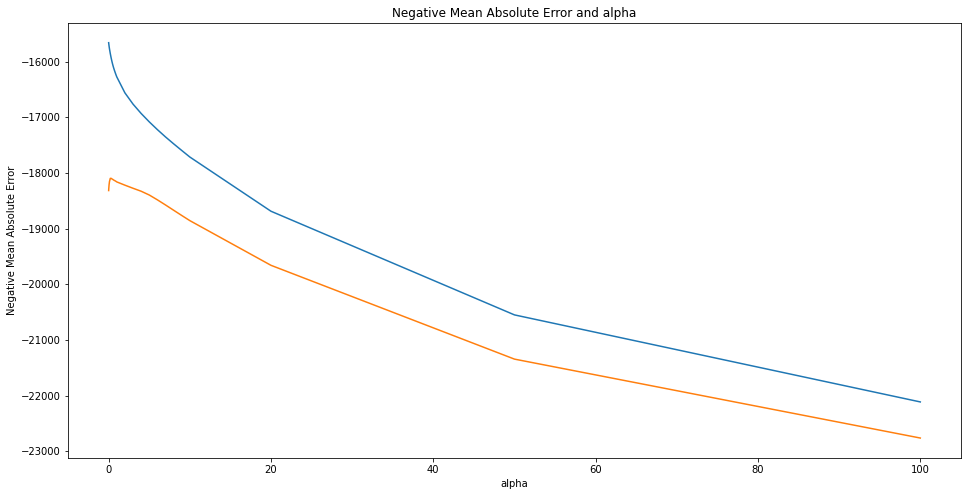

In [264]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

**Choosing best value of alpha**

In [265]:
model_cv.best_params_

{'alpha': 0.3}

In [266]:
alpha = 0.3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9078821487338579
0.8448639567699139


In [267]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-329856.915, 'WoodDeckSF'),
 (207842.834, 'constant'),
 (76608.93, 'DiffYrSold'),
 (-57274.626, 'LotConfig_FR2'),
 (53896.571, 'MSSubClass_70'),
 (52218.845, 'Neighborhood_Crawfor'),
 (-46728.627, 'Neighborhood_CollgCr'),
 (46306.955, 'MSSubClass_60'),
 (-43081.753, '3SsnPorch'),
 (-42435.175, 'LotConfig_FR3'),
 (41835.681, 'MSSubClass_80'),
 (-41331.799, 'LandSlope_Sev'),
 (40440.578, 'BsmtFullBath'),
 (-38770.049, 'Neighborhood_Edwards'),
 (38706.233, 'DiffGarageYrBlt'),
 (37238.876, 'GarageCars'),
 (36592.652, 'Fireplaces'),
 (-36302.473, 'MSSubClass_85'),
 (33504.705, 'MSSubClass_50'),
 (32395.007, '1stFlrSF'),
 (-30497.733, 'LotShape_IR2'),
 (-30353.204, 'LowQualFinSF'),
 (30064.151, 'MSSubClass_45'),
 (-29710.543, 'LotConfig_Inside'),
 (-28427.444, 'LotConfig_CulDSac'),
 (28182.766, 'MSZoning_RM'),
 (-27975.422, 'MSZoning_FV'),
 (27818.881, 'LandContour_HLS'),
 (27441.988, 'FullBath'),
 (-27277.924, 'EnclosedPorch'),
 (-27186.643, 'LandContour_Lvl'),
 (-27029.446, 'GrLivArea'),

## Lasso Regression

In [268]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [269]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038344,0.003058,0.003028,0.000596,0.0001,{'alpha': 0.0001},-17560.431442,-20234.025866,-18785.852978,-19260.498881,...,-18355.324480,1484.594489,26,-15813.591271,-15893.755658,-15221.854840,-15352.074064,-16025.336534,-15661.322474,315.747870
1,0.037175,0.002812,0.002647,0.000204,0.001,{'alpha': 0.001},-17560.424179,-20233.463009,-18785.796693,-19259.975797,...,-18355.098512,1484.379365,25,-15813.612651,-15893.767933,-15221.879080,-15352.079944,-16025.358335,-15661.339589,315.748867
2,0.034209,0.000985,0.002437,0.000192,0.01,{'alpha': 0.01},-17560.351557,-20227.835960,-18785.233881,-19254.745468,...,-18352.839239,1482.229371,23,-15813.832435,-15893.897961,-15222.123239,-15352.139105,-16025.576341,-15661.513816,315.759930
3,0.033559,0.001056,0.002401,0.000068,0.05,{'alpha': 0.05},-17560.053781,-20218.151411,-18782.750282,-19231.648319,...,-18345.892514,1476.600656,22,-15814.834588,-15894.502314,-15223.213816,-15352.403836,-16026.567844,-15662.304480,315.818963
4,0.033653,0.000630,0.002275,0.000053,0.1,{'alpha': 0.1},-17559.675314,-20214.533422,-18779.641418,-19217.692424,...,-18341.890486,1473.528414,21,-15816.080949,-15895.251077,-15224.575647,-15352.763014,-16027.898564,-15663.313850,315.907490


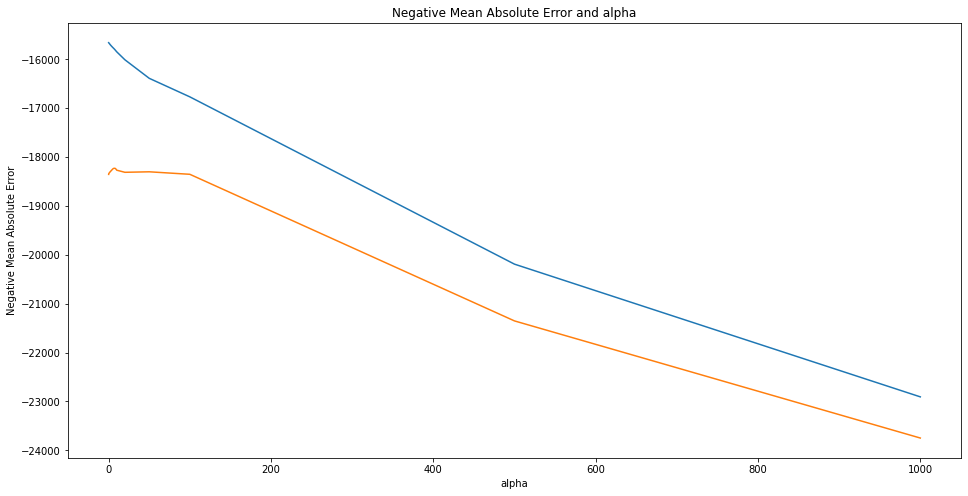

In [270]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

In [271]:
model_cv.best_params_

{'alpha': 7.0}

In [272]:
alpha = 7.0
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9106599474287658
0.8172363991505536


In [273]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-443251.657, 'WoodDeckSF'),
 (207100.878, 'constant'),
 (89941.664, 'DiffYrSold'),
 (-71344.428, 'LotConfig_FR2'),
 (66989.877, 'Neighborhood_Crawfor'),
 (65464.355, 'MSSubClass_70'),
 (-57604.578, '3SsnPorch'),
 (-52688.391, 'Neighborhood_Edwards'),
 (-51704.198, 'Neighborhood_CollgCr'),
 (50019.124, 'MSSubClass_80'),
 (-49577.58, 'LotConfig_FR3'),
 (-48078.403, 'LandSlope_Sev'),
 (45744.966, 'MSSubClass_60'),
 (41193.37, 'BsmtFullBath'),
 (40732.692, '1stFlrSF'),
 (-39640.273, 'MSSubClass_85'),
 (38331.949, 'DiffGarageYrBlt'),
 (-38188.232, 'EnclosedPorch'),
 (-38114.391, 'LandSlope_Mod'),
 (-37990.909, 'LotConfig_Inside'),
 (37298.955, 'GarageCars'),
 (34956.509, 'Fireplaces'),
 (34835.208, 'MSSubClass_50'),
 (-32480.499, 'MSZoning_FV'),
 (-31618.51, '2ndFlrSF'),
 (30975.281, 'MSSubClass_45'),
 (-30562.273, 'LotShape_IR2'),
 (-30108.517, 'LowQualFinSF'),
 (28241.538, 'LandContour_HLS'),
 (-28102.294, 'LotConfig_CulDSac'),
 (27912.718, 'FullBath'),
 (-27449.958, 'GrLivArea'),
 (271

# Ridge Regression Performs better 

In [278]:
rfe_scores.sort_values(by="Rank",ascending=True)

,Column_Names,Status,Rank
131,RoofStyle_Shed,True,1
139,Exterior1st_BrkFace,True,1
138,Exterior1st_BrkComm,True,1
133,RoofMatl_Metal,True,1
132,RoofMatl_Membran,True,1
126,OverallCond_9,True,1
125,OverallCond_8,True,1
124,OverallCond_7,True,1
123,OverallCond_6,True,1
122,OverallCond_5,True,1
